# ZADANIE 1 -  Generator ACORN 

In [357]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [358]:
def ACORN(N: int, k: int, M: int, Lag: int, seed: int = (2**13) - 1) -> np.array:
    """Funkcja generuje N próbek z generatora ACORN

    Args:
        N: liczba generowanych zmiennych
        k: rząd algorytmu
        M: dzielnik
        Lag: opóźnienie w działaniu algorytmu

    Returns:
        tuple: listę N próbek z generatora ACORN

    Example:
        >>> ACORN(1, 9, 2**30 - 1, 1000)
        array([0.7813808])

    """
    X = np.zeros((k, N + Lag))

    X[:, 0] = seed
    X[0, 1:] = seed

    for i in range(1, k):
        for j in range(1, N + Lag):
            X[i, j] = (X[i - 1, j] + X[i, j - 1]) % M

    Y = (X[k - 1, Lag : Lag + N]) / M

    return Y


# Parametery
N = 1000
k = 9
M = 2**30 - 1
Lag = 10**3

Y_ACORN = ACORN(N, k, M, Lag)

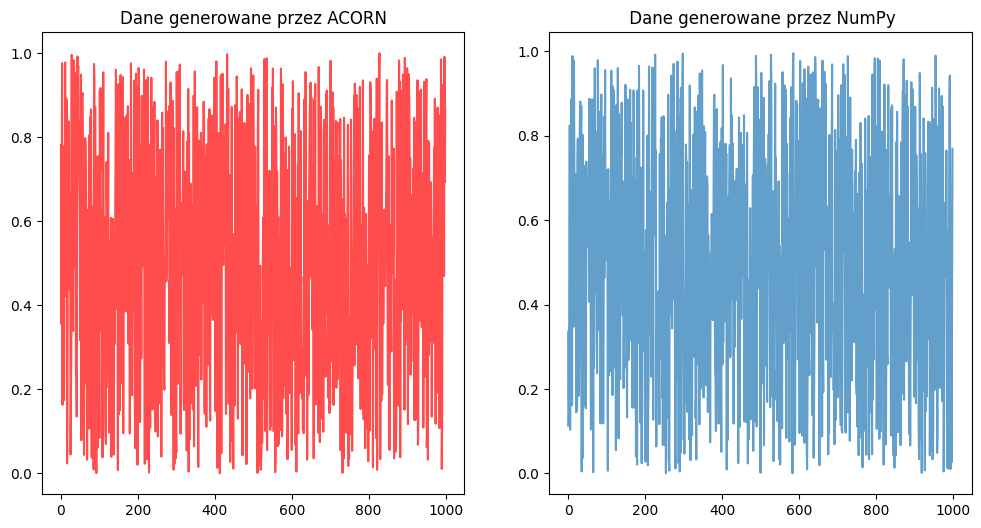

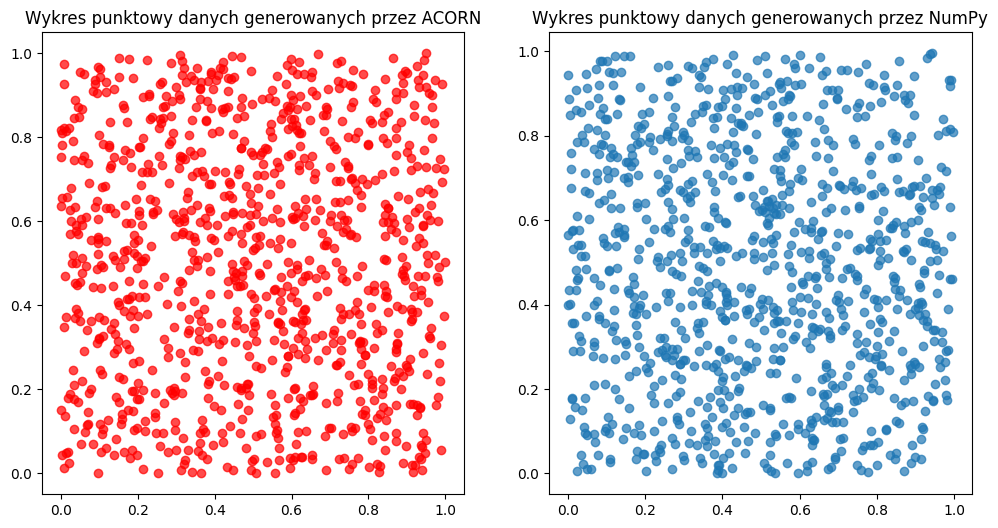

Text(0.5, 1.0, 'Histogram zmiennych z NumPy')

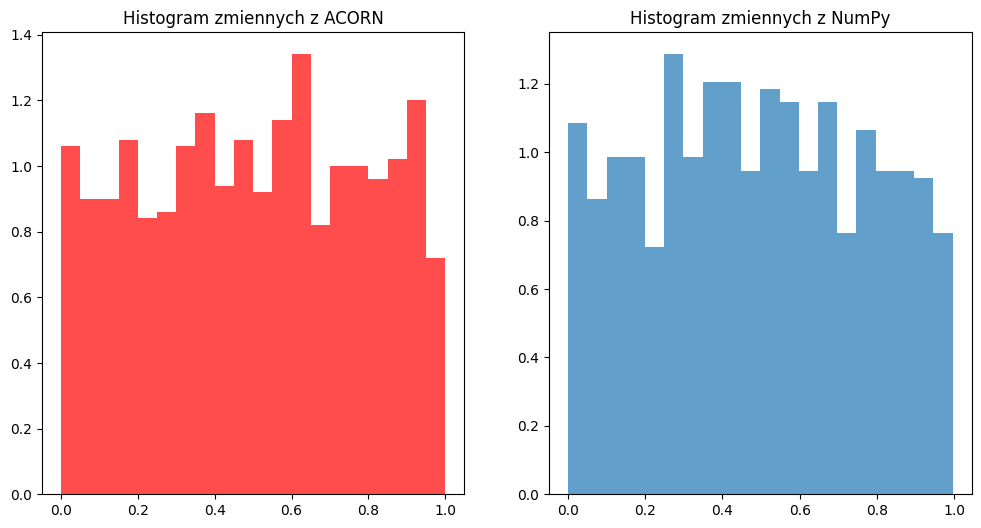

In [359]:
Y_numpy = [np.random.uniform(0, 1) for i in range(N)]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(Y_ACORN, color="r", alpha=0.7)
plt.title("Dane generowane przez ACORN")
plt.subplot(1, 2, 2)
plt.plot(Y_numpy, alpha=0.7)
plt.title(" Dane generowane przez NumPy")
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(Y_ACORN[:-1], Y_ACORN[1:], color="r", alpha=0.7)
plt.title("Wykres punktowy danych generowanych przez ACORN")
plt.subplot(1, 2, 2)
plt.scatter(Y_numpy[:-1], Y_numpy[1:], alpha=0.7)
plt.title("Wykres punktowy danych generowanych przez NumPy")
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(Y_ACORN, bins=20, density=True, alpha=0.7, color="r")
plt.title("Histogram zmiennych z ACORN")
plt.subplot(1, 2, 2)
plt.hist(Y_numpy, bins=20, density=True, alpha=0.7)
plt.title("Histogram zmiennych z NumPy")

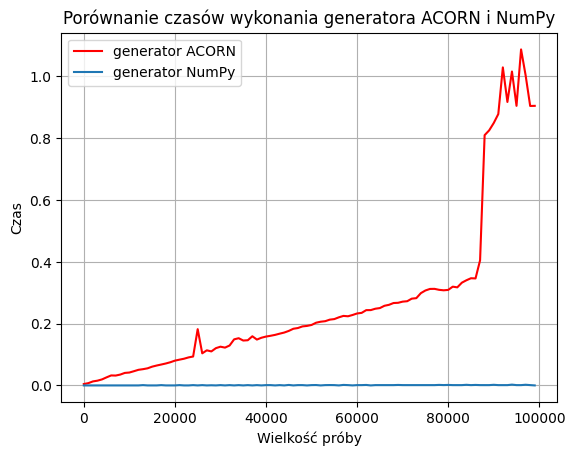

In [360]:
N = np.arange(0, 100000, 1000)

acorn_times = []
numpy_times = []

for n in N:
    start = time.time()
    ACORN(n, k, M, Lag)
    t = time.time() - start
    acorn_times.append(t)

for n in N:
    start = time.time()
    np.random.uniform(0, 1, n)
    t = time.time() - start
    numpy_times.append(t)

plt.plot(N, acorn_times, color="r", label="generator ACORN")
plt.plot(N, numpy_times, label="generator NumPy")
plt.title("Porównanie czasów wykonania generatora ACORN i NumPy")
plt.xlabel("Wielkość próby")
plt.ylabel("Czas")
plt.legend()
plt.grid()
plt.show()

# ZADANIE 2 - Generowanie rozkładu normalnego

In [361]:
import numpy as np
import matplotlib.pyplot as plt
import time

GENERATOR BOXA-MULLERA

In [362]:
def box_muller() -> tuple:
    """Funkcja generuje liczby pseudolosowe metodą Boxa-Mullera

    Returns:
        tuple: dwie liczby z rozkładu noralnego

    Example:
        >>> box_muller()
        (-0.2450599351750017, 0.045448728066960306)
    """
    u1 = np.random.uniform(0, 1)
    u2 = np.random.uniform(0, 1)

    z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)

    return z1, z2

In [363]:
samples_box_muller = []
for i in range(10000):
    bm = box_muller()
    samples_box_muller.append(bm[0])
    samples_box_muller.append(bm[1])

In [364]:
def gestosc_normal(x: float) -> float:
    """Zwraca wartość gęstości prawdopodobieństwa standardowego rozkładu normalnego w punkcie x.

    Args:
        x: Wartość wejściowa.

    Return:
        float: Wartości funkcji gęstości prawdopodobieństwa standardowego rozkładu normalnego w punkcie x.

    Example:
        >>> gestosc_normal(1)
        0.24197072451914337
    """
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

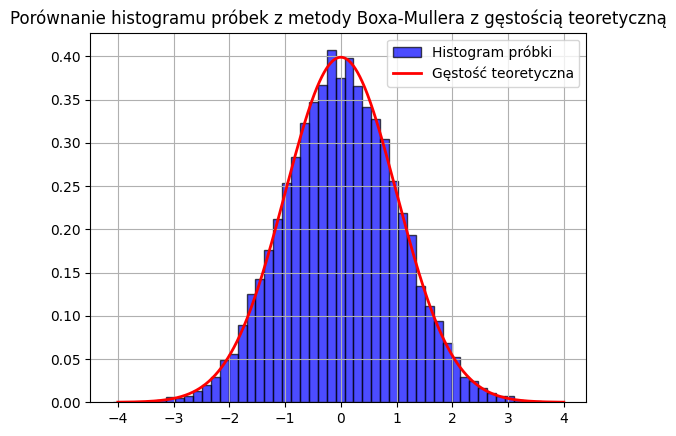

In [365]:
plt.hist(
    samples_box_muller,
    bins=50,
    density=True,
    alpha=0.7,
    color="blue",
    edgecolor="black",
    label="Histogram próbki",
)
x = np.linspace(-4, 4, 1000)
plt.plot(x, gestosc_normal(x), color="red", lw=2, label="Gęstość teoretyczna")
plt.title("Porównanie histogramu próbek z metody Boxa-Mullera z gęstością teoretyczną")
plt.legend()
plt.grid()
plt.show()

GENERATOR MARSAGLII

In [366]:
def marsaglia(mi: int, sigma: int) -> tuple:
    """Generuje liczby pseudolosowe metodą Marsaglii.

    Args:
        mi: Średnia rozkładu normalnego.
        sigma: Odchylenie standardowe rozkładu normalnego.

    Returns:
        tuple: Dwie liczby z rozkładu normalnego o zadanej średniej mi i odchyleniu standardowym sigma.

    Example:
        >>> marsaglia(0, 1)
        (0.3518546871028868, 2.4160008431319757)
    """
    u1 = np.random.uniform(-1, 1)
    u2 = np.random.uniform(-1, 1)

    s = u1**2 + u2**2
    while s >= 1 or s == 0:
        u1, u2 = 2 * np.random.rand(2) - 1
        s = u1**2 + u2**2

    z1 = u1 * np.sqrt(-2 * np.log(s) / s)
    z2 = u2 * np.sqrt(-2 * np.log(s) / s)

    return sigma * z1 + mi, sigma * z2 + mi

In [367]:
samples_marsaglia = []
for i in range(10000):
    m = marsaglia(0, 1)
    samples_marsaglia.append(m[0])
    samples_marsaglia.append(m[1])

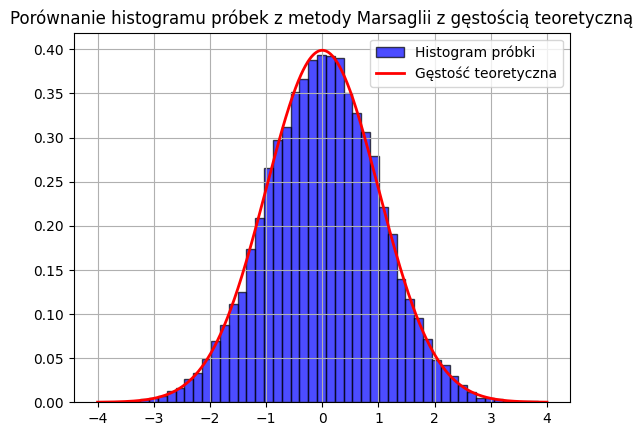

In [368]:
plt.hist(
    samples_marsaglia,
    bins=50,
    density=True,
    alpha=0.7,
    color="blue",
    edgecolor="black",
    label="Histogram próbki",
)
x = np.linspace(-4, 4, 1000)
plt.plot(x, gestosc_normal(x), color="red", lw=2, label="Gęstość teoretyczna")
plt.title("Porównanie histogramu próbek z metody Marsaglii z gęstością teoretyczną")
plt.legend()
plt.grid()
plt.show()

GENERATOR TUZIN

In [369]:
def tuzin(mi: int, sigma: int) -> float:
    """Generuje liczbę pseudolosową z rozkładu normalnego metodą "tuzin".

    Args:
        mi: Średnia rozkładu normalnego.
        sigma: Odchylenie standardowe rozkładu normalnego.

    Returns:
        float: Liczba z rozkładu normalnego o zadanej średniej mi i odchyleniu standardowym sigma.

    Example:
        >>> tuzin(0, 1)
        (0.3518546871028868, 2.4160008431319757)
    """
    U = [np.random.uniform() for i in range(12)]
    X = np.sum(U) - 6
    return sigma * X + mi

In [370]:
samples_tuzin = [tuzin(0, 1) for _ in range(10000)]

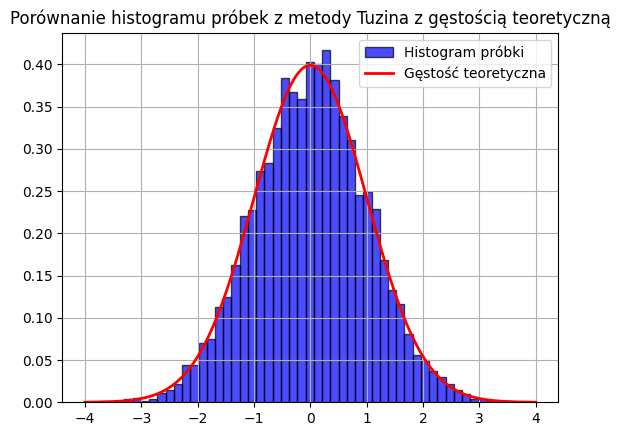

In [371]:
plt.hist(
    samples_tuzin,
    bins=50,
    density=True,
    alpha=0.7,
    color="blue",
    edgecolor="black",
    label="Histogram próbki",
)
x = np.linspace(-4, 4, 1000)
plt.plot(x, gestosc_normal(x), color="red", lw=2, label="Gęstość teoretyczna")
plt.title("Porównanie histogramu próbek z metody Tuzina z gęstością teoretyczną")
plt.legend()
plt.grid()
plt.show()

GENERATOR ZIGGURAT

In [372]:
def gestosc_normal(x: float) -> float:
    """Zwraca wartość gęstości prawdopodobieństwa standardowego rozkładu normalnego w punkcie x.

    Args:
        x: Wartość wejściowa.

    Return:
        float: Wartości funkcji gęstości prawdopodobieństwa standardowego rozkładu normalnego w punkcie x.

    Example:
        >>> gestosc_normal(1)
        0.24197072451914337
    """
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)


def odwrotna_gestosc_normal(y: float) -> float:
    """Zwraca odwrotność funkcji dystrybuanty standardowego rozkładu normalnego w punkcie y.

    Args:
        y: Wartość wejściowa.

    Returns:
        float: Wartości odwrotności funkcji dystrybuanty standardowego rozkładu normalnego w punkcie y.

    Example:
        >>> odwrotna_gestosc_normal(0.24197072451914337)
        1.0
    """
    return np.sqrt(-2 * np.log(np.sqrt(2 * np.pi) * y))


def przedzialy(N: int = 256, x0: float = 3.44) -> tuple:
    """Generuje przedziały do metody Ziggurata.

    Args:
        N: Liczba przedziałów. Domyślnie 256.
        x0: Wartość początkowa. Domyślnie 3.44.

    Returns:
        tuple: Dwie tablice zawierające przedziały (x) i odpowiadające im gęstości (y).

    Example:
        >>> przedzialy(16, 3.44)
        (array([3.44      , 3.23222921, 3.0974141 , 2.99590161, 2.91367136,
                2.84408838, 2.78347103, 2.72955708, 2.68085359, 2.63632174,
                2.59520857, 2.55695021, 2.52111306, 2.48735621, 2.4554066 ,
                2.42504197, 0.        ]),
        array([0.00107467, 0.00214935, 0.0032931 , 0.00448664, 0.00572062,
                0.00698942, 0.00828926, 0.00961742, 0.0109718 , 0.0123508 ,
                0.01375308, 0.01517758, 0.0166234 , 0.01808976, 0.01957603,
                0.02108164]))
    """
    x = np.zeros(N + 1)
    y = np.zeros(N)

    x[0] = x0
    x[-1] = 0
    y[0] = gestosc_normal(x[0])

    A = x[0] * y[0]
    for i in range(N - 1):
        y[i + 1] = A / x[i] + y[i]
        x[i + 1] = odwrotna_gestosc_normal(y[i + 1])

    return x, y


xs, ys = przedzialy()


def ziggurat(xs: np.array, ys: np.array, N: int = 256) -> float:
    """Generuje liczby pseudolosowe metodą Ziggurata.

    Args:
        xs: Tablica przedziałów.
        ys: Tablica odpowiadających im gęstości.
        N: Liczba przedziałów. Domyślnie 256.

    Returns:
        float: Liczba z rozkładu normalnego.

    Example:
        >>> xs, ys = przedzialy()
        >>> ziggurat(xs, ys)
            -0.9590442042002225

    """
    while True:
        i = np.random.randint(0, N - 1)
        u0 = np.random.uniform(0, 1)
        u1 = np.random.uniform(0, 1)

        choice = np.random.choice([-1, 1])

        x = u0 * xs[i]
        y = ys[i] + u1 * (ys[i + 1] - ys[i])

        if i == 0:
            x = -np.log(u0) / xs[0]
            y = -np.log(u1)
            if 2 * y > x**2:
                return (x + xs[0]) * choice
        else:
            if x < xs[i + 1]:
                return x * choice

            if y < gestosc_normal(x):
                return x * choice

C:\Users\admmass\AppData\Local\Temp\ipykernel_14976\2805783194.py:30: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(-2 * np.log(np.sqrt(2 * np.pi) * y))


In [373]:
samples_ziggurat = [ziggurat(xs, ys) for _ in range(10000)]

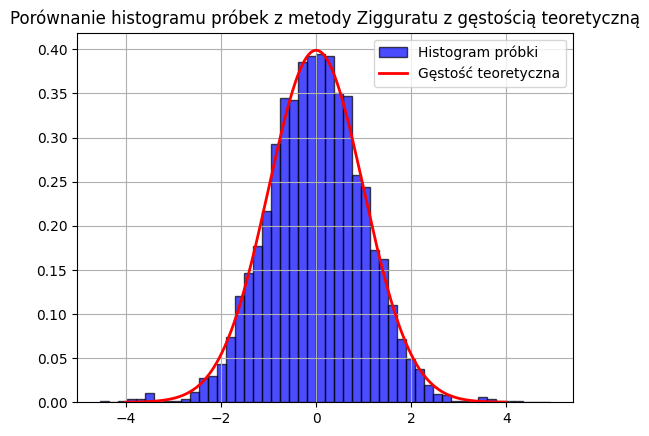

In [374]:
plt.hist(
    samples_ziggurat,
    bins=50,
    density=True,
    alpha=0.7,
    color="blue",
    edgecolor="black",
    label="Histogram próbki",
)
x = np.linspace(-4, 4, 1000)
plt.plot(x, gestosc_normal(x), color="red", lw=2, label="Gęstość teoretyczna")
plt.title("Porównanie histogramu próbek z metody Zigguratu z gęstością teoretyczną")
plt.legend()
plt.grid()
plt.show()

In [396]:
N = np.arange(0, 10000, 200)

box_muller_times = []
marsaglia_times = []
tuzin_times = []
ziggurat_times = []

In [397]:
for n in N:
    start = time.time()
    samples = [box_muller() for _ in range(n)]
    t = time.time() - start
    box_muller_times.append(t)

In [398]:
for n in N:
    start = time.time()
    samples = [marsaglia(0, 1) for _ in range(n)]
    t = time.time() - start
    marsaglia_times.append(t)

In [399]:
for n in N:
    start = time.time()
    samples = [tuzin(0, 1) for _ in range(n)]
    t = time.time() - start
    tuzin_times.append(t)

In [400]:
for n in N:
    start = time.time()
    samples = [ziggurat(xs, ys) for _ in range(n)]
    t = time.time() - start
    ziggurat_times.append(t)

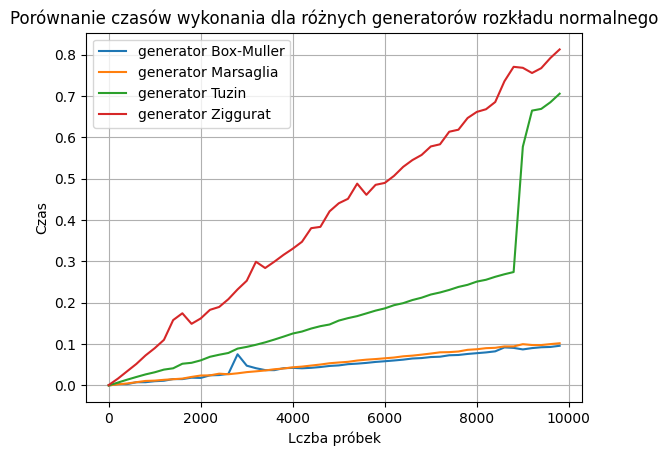

In [401]:
plt.plot(N, box_muller_times, label="generator Box-Muller")
plt.plot(N, marsaglia_times, label="generator Marsaglia")
plt.plot(N, tuzin_times, label="generator Tuzin")
plt.plot(N, ziggurat_times, label="generator Ziggurat")
plt.xlabel("Lczba próbek")
plt.ylabel("Czas")
plt.title("Porównanie czasów wykonania dla różnych generatorów rozkładu normalnego")
plt.legend()
plt.grid()
plt.show()